In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# import tensorflow_addons as tfa

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
# path = "/content/drive/MyDrive/DLNLP_A4/embedding_glove.pkl"

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [ ]:
# import tensorflow_text as tf_text

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DLNLP_A4/data/TrainData.csv")

In [ ]:
data.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [ ]:
# inp = data["Text"]
op = data["Category"]

In [ ]:
# def cal_size(text):
#     return  len(text.split())

# lns = data["Text"].apply(cal_size)
# ln=max(lns)
# print(f"Before max doc length {ln}")
# lns.describe(percentiles=[.25, .5, .75,0.90,0.98])

In [ ]:
# lns.describe(percentiles=[.25, .5, .75,0.90,0.98])

In [ ]:
# plt.plot(lns)
# plt.show()

In [ ]:
# def unique(text):
#     return  set(text.split())

# sets = data["Text"].apply(unique)

# sts =set()
# for i in sets:
#     sts.update(i)
# print(f"Before: max unique words {len(sts)}")

In [ ]:
# def unique1(text):
#     text = text.numpy()
#     return set(text.split())

In [ ]:
# prepo = data["Text"].apply(text_preprocessing)
# asets = prepo.apply(unique1)
# asts =set()
# for i in asets:
#     asts.update(i)
# print(f"After: max unique words {len(asts)}")

In [ ]:
# def cal_size2(text):
#     text = text.numpy()
#     return  len(text.split())

In [ ]:
# alns = prepo.apply(cal_size2)
# aln=max(alns)
# print(f"Before max doc length {aln}")
# alns.describe(percentiles=[.25, .5, .75,0.90,0.98])

In [ ]:
# alns.plot()

In [ ]:
# del alns,lns, prepo,sts,asts,sets,asets
# import gc
# gc.collect()

In [ ]:
op.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [ ]:
dct_tr = {'business':0, 'tech':1, 'politics':2, 'sport':3, 'entertainment':4}
con_tr = op.map(dct_tr)

In [ ]:
pip install autocorrect

     |████████████████████████████████| 622 kB 4.1 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.5.0-py3-none-any.whl size=621851 sha256=5a68ad7643c5fc402b54c1eba62d15897a9460df300397dad96412ca2a665a07
  Stored in directory: /root/.cache/pip/wheels/3d/8e/bd/f6fd900a056a031bf710a00bca338d86f43b83f0c25ab5242f
Successfully built autocorrect


In [ ]:
from autocorrect import Speller

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import re

In [ ]:
# path

In [ ]:
def text_preprocessing2(text):
    
    lemmatizer = WordNetLemmatizer()
    
    
    CONTRACTIONS = pickle.load(open("/content/drive/MyDrive/DLNLP_A4/contractions.pkl","rb"))
    
    text = text.split()
#     print(text)
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if (word not in STOPWORDS)]
    text = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in text]
    
    text =" ".join([word for word in text])
        
    text =text.lower()
    REPLACE_BY_SPACE_RE = re.compile('\([^()]*\)')
    text = re.sub(REPLACE_BY_SPACE_RE," ",text)
    text = text.split()
    tmp = []
    chars = [str(i) for i in range(11)]
    for word in text:
#         word = word.strip()
        if(len(word)<=2):
            if ("£" in word):
                tmp.append("$")
            
            if ("$" in word):
                tmp.append("$")
        

        if(len(word)>2):
            fl = False
            for cr in chars:
                if cr in word and not (("£" in word) or ("$" in word)):
                    fl = True
            if not fl:
                if ("£" in word):
                    tmp.append("$")
                elif ("$" in word):
                    tmp.append("$")
                else:
                    tmp.append(word)

    text = " ".join([word for word in tmp ])

    return text

In [ ]:
ip = data["Text"].apply(text_preprocessing2)

In [ ]:
path2 = "/content/drive/MyDrive/DLNLP_A4/"

In [ ]:
sent_len = 850

In [ ]:
def tf_lower_and_split_punct(text):
  # Split accecented characters.
#     text = tf_text.normalize_utf8(text, 'NFKD')
    text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
    text = tf.strings.regex_replace(text, '[^ a-z0-9.$,]', '')
  # Add spaces around punctuation.
    text = tf.strings.regex_replace(text, '[.?!,$]', r' \0 ')
  # Strip whitespace.
    text = tf.strings.strip(text)

    text = tf.strings.join([text], separator=' ')
    return text

In [ ]:
max_vocab_size = 23732

input_text_processor = preprocessing.TextVectorization(max_tokens=max_vocab_size,
                                                       output_sequence_length=sent_len,
                                                       standardize = tf_lower_and_split_punct)

input_text_processor.adapt(ip)

# Here are the first 10 words from the vocabulary:
input_text_processor.get_vocabulary()[:10]

['', '[UNK]', '.', 'said', 'would', 'year', 'also', 'new', 'people', '$']

In [ ]:
voc = input_text_processor.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
# path_glove = "/home/vijay/Desktop/IISC/Sem 3/DL_NLP/A4/pretrained/glove.840B.300d.txt"

In [ ]:
# path_to_glove_file = os.path.join(
#     os.getcwd(), "glove.840B.300d.txt"
# )

# embeddings_index = {}
# with open(path_glove) as f:
#     for line in f:
#         word, coefs = line.split(maxsplit=1)
#         coefs = np.fromstring(coefs, "f", sep=" ")
#         embeddings_index[word] = coefs

# print("Found %s word vectors." % len(embeddings_index))

In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 300
hits = 0
misses = 0

# # Prepare embedding matrix
# embedding_matrix_gl = np.zeros((num_tokens, embedding_dim))

In [ ]:
num_tokens

23732

In [ ]:
# embedding_matrix_gl.shape

In [ ]:
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
    
#     if embedding_vector is not None and len(embedding_vector)>0:
#         assert(embedding_matrix_gl[i].shape==embedding_vector.shape)
        
#         # Words not found in embedding index will be all-zeros.
#         # This includes the representation for "padding" and "OOV"
#         embedding_matrix_gl[i] = embedding_vector
#         hits += 1
#     else:
#         if(i==1 or i==0):
#             continue
#         else:   
#             embedding_matrix_gl[i] = np.random.uniform(0,1,300)
#         misses += 1
# print("Converted %d words (%d misses)" % (hits, misses))

In [ ]:
# del data,embedding_vector,embedding_matrix_gl
# import gc
# gc.collect()

In [ ]:
# pickle.dump(embedding_matrix_gl,open("embedding_glove.pkl","wb"))

In [ ]:
# path

In [ ]:
# embedding_matrix_gl = pickle.load(open("/content/drive/MyDrive/DLNLP_A4/embedding_glove2.pkl","rb"))

In [ ]:
# embedding_matrix_gl.shape

(23732, 300)

In [ ]:
embedding_matrix_gl = pickle.load(open("/content/drive/MyDrive/DLNLP_A4/saved_embeddings/emb_glove.pkl","rb"))
# embedding_matrix_w2v = pickle.load(open("/content/drive/MyDrive/DLNLP_A4/saved_embeddings/emb_w2v.pkl","rb"))
# embedding_matrix_ft = pickle.load(open("/content/drive/MyDrive/DLNLP_A4/saved_embeddings/emb_fast_txt.pkl","rb"))

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding,LSTM, GRU,Dropout,Bidirectional,Dense
from tensorflow.keras.layers import Conv2D
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [ ]:
# X_tr,X_vl,y_tr,y_vl = train_test_split(ip,con_tr,random_state=44,test_size=0.2)

# Done preprocessing

In [ ]:
x_train = input_text_processor(np.array([[s] for s in ip])).numpy()
# x_val = input_text_processor(np.array([[s] for s in X_vl])).numpy()
y_train = np.array(con_tr)
# y_val = np.array(y_vl)

In [ ]:
# del X_tr,X_vl,y_tr,y_vl 

In [ ]:
del data,op,ip

In [ ]:
    
  embedding_layer = Embedding(
      num_tokens,
      embedding_dim,
      embeddings_initializer=keras.initializers.Constant(embbed),
      trainable=False,
  )
    

In [ ]:
class_dim = 5

In [ ]:
embedding_matrix_gl.shape

(23732, 300)

In [ ]:
def c_lstm(embbed):

    input_layer = tf.keras.layers.Input(shape=(sent_len,), dtype=tf.int32)
    
    
    embedded_sequences = embedding_layer(input_layer)
    embedded_sequences = tf.expand_dims(embedded_sequences, -1)

    convlayer = Conv2D(150, kernel_size = (3,embedding_dim), activation="relu")(embedded_sequences)
    squeeze = tf.squeeze(convlayer, [2])
    layer = Bidirectional(LSTM(embedding_dim,return_sequences=True))(squeeze)
    layer =Dropout(0.5)(layer)
    output = Dense(class_dim,kernel_regularizer = tf.keras.regularizers.l2(l=0.001) )(layer)
    
    model = Model(input_layer, output)
    
    return model
# c_lstm()

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# embds = [embedding_matrix_gl,embedding_matrix_w2v,embedding_matrix_ft]

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
models = []

In [ ]:

clstm_model = c_lstm(embedding_matrix_gl)
opt = tf.optimizers.Adam(learning_rate= 0.0001)
clstm_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=opt, metrics=["accuracy"]
)
history = clstm_model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2,callbacks=[callback])

Epoch 1/15
38/38 [==============================] - 55s 533ms/step - loss: 1.5048 - accuracy: 0.4354 - val_loss: 1.2002 - val_accuracy: 0.5705
Epoch 2/15
38/38 [==============================] - 19s 509ms/step - loss: 0.7343 - accuracy: 0.7752 - val_loss: 0.3773 - val_accuracy: 0.9228
Epoch 3/15
38/38 [==============================] - 19s 511ms/step - loss: 0.3369 - accuracy: 0.8985 - val_loss: 0.2822 - val_accuracy: 0.9094
Epoch 4/15
38/38 [==============================] - 19s 511ms/step - loss: 0.2326 - accuracy: 0.9354 - val_loss: 0.2975 - val_accuracy: 0.9094
Epoch 5/15
38/38 [==============================] - 19s 511ms/step - loss: 0.2704 - accuracy: 0.9270 - val_loss: 0.2424 - val_accuracy: 0.9430
Epoch 6/15
38/38 [==============================] - 19s 511ms/step - loss: 0.1676 - accuracy: 0.9664 - val_loss: 0.1919 - val_accuracy: 0.9564
Epoch 7/15
38/38 [==============================] - 19s 511ms/step - loss: 0.1558 - accuracy: 0.9572 - val_loss: 0.1593 - val_accuracy: 0.9631

In [ ]:
# clstm_model.summary()

In [ ]:
clstm_model

In [ ]:
tf.keras.models.save_model(clstm_model,path+"model1")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DLNLP_A4/embedding_glove2.pklmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DLNLP_A4/embedding_glove2.pklmodel1/assets


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
preds = aclstm_model.predict(x_val)
conv_pred = np.argmax(preds,axis=1)
f1_score(conv_pred,y_val,average="micro")

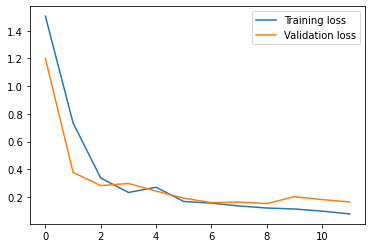

In [ ]:
trloss = history.history["loss"]
vlloss = history.history["val_loss"]
plt.plot(trloss,label="Training loss")
plt.plot(vlloss,label="Validation loss")
plt.legend()
# plt.savefig(path2+"model1_plots.jpg")
plt.show()

# Testing 

In [ ]:
def get_testpreds(clstm_model):
  labels = pd.read_excel("/content/drive/MyDrive/DLNLP_A4/Assignment4_TestLabels.xlsx")
  labels["Category"] = labels["Label - (business, tech, politics, sport, entertainment)"]
  dct_tr = {'business':0, 'tech':1, 'politics':2, 'sport':3, 'entertainment':4}
  y_ts = labels["Category"].map(dct_tr)
  x_test = pickle.load(open("/content/drive/MyDrive/DLNLP_A4/x_testv.pkl","rb"))
  y_test = np.array(y_ts)
  t_preds = clstm_model.predict(x_test)
  t_conv_pred = np.argmax(t_preds,axis=1)
  return f1_score(t_conv_pred,y_test,average="micro")


In [ ]:
get_testpreds(clstm_model)

0.9591836734693877

In [ ]:
clstm_model = tf.keras.models.load_model("/content/drive/MyDrive/DLNLP_A4/embedding_glove2.pklmodel1")

In [ ]:
# x_test = input_text_processor(np.array([[s] for s in x_ts])).numpy()


0.927891156462585

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
rev_dct_tr = {v:k for k,v in dct_tr.items()}
inverse = pd.DataFrame({"Op":t_conv_pred})["Op"].map(rev_dct_tr)
inverse

0              sport
1               tech
2              sport
3           business
4              sport
           ...      
730         business
731    entertainment
732             tech
733         business
734         politics
Name: Op, Length: 735, dtype: object

In [ ]:
["business","tech","politics","sport","entertainment"]

In [ ]:
confusion_matrix(labels["Category"], inverse,labels=["business","tech","politics","sport","entertainment"])

array([[167,   2,   1,   0,   6],
       [  2, 132,   0,   0,   1],
       [ 16,   2, 108,  13,   4],
       [  1,   3,   0, 164,   0],
       [  0,   2,   0,   0, 111]])